In [2]:
import sys
sys.path.append("../")
from magpie import realsense_wrapper as real
import numpy as np

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [3]:
rsc = real.RealSense()
rsc.initConnection()

In [6]:
p, rgbd_image = rsc.getPCD()
# p, rgbd_image = rsc.getPCD(adjust_extrinsics=True)
image = np.array(rgbd_image.color)
img = Image.fromarray(image)



In [1]:
import sys
sys.path.append("../")
# from magpie.perception.label_owlvit import LabelOWLViT
from magpie.perception.label_dino import LabelDINO
# path = "google/owlvit-base-patch32"
# label_vit = LabelOWLViT(pth=path, topk=3)
label_dino = LabelDINO(topk=3)

2024-09-09 15:08:36.504749: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-09 15:08:36.504799: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-09 15:08:36.506088: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-09 15:08:36.513412: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-09-09 15:08:37.567819: W tensorflow/compiler/tf2

['yellow block. [SEP]' 'yellow block. [SEP]' 'yellow block. [SEP]'
 'yellow block. [SEP]' 'yellow block. [SEP]' 'yellow block. [SEP]'
 'yellow block. [SEP]' 'yellow' 'yellow block [SEP]' 'yellow block. [SEP]'
 'yellow block. [SEP]' 'yellow block' 'yellow block. [SEP]'
 'yellow block. [SEP]' 'yellow block. [SEP]' 'yellow block'
 'yellow block. [SEP]' 'yellow block [SEP]' 'yellow block'
 'yellow block. [SEP]' 'yellow block.' 'yellow block. [SEP]'
 'yellow block. [SEP]' 'yellow block' 'yellow block. [SEP]'
 'yellow block. [SEP]' 'yellow block. [SEP]' '[SEP]' 'yellow block. [SEP]'
 'yellow block. [SEP]' 'yellow block. [SEP]' 'yellow block [SEP]'
 'yellow block. [SEP]' 'yellow block' 'yellow block [SEP]'
 'yellow block. [SEP]' 'yellow block [SEP]' 'yellow block [SEP]'
 'yellow block' 'yellow block' 'yellow block' 'yellow block'
 'yellow block. [SEP]' 'yellow block. [SEP]' 'yellow block. [SEP]'
 'yellow block' 'yellow block. [SEP]' 'yellow block. [SEP]' 'yellow'
 'yellow block' 'yellow block

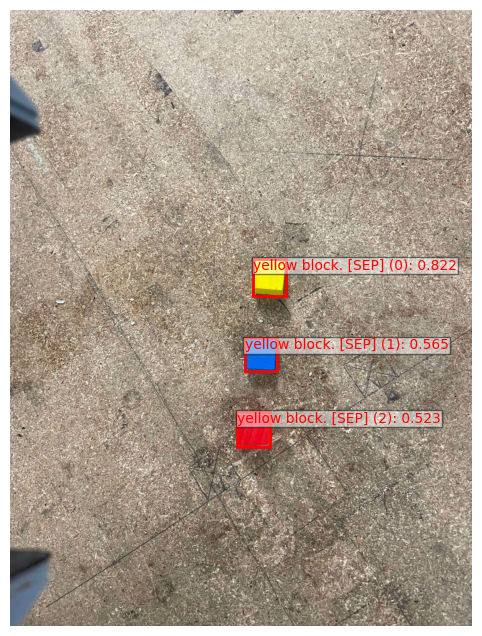

In [2]:
import numpy as np
from PIL import Image
image = Image.open("test.jpg").convert("RGB")
image = np.array(image)
label_dino.set_threshold(0.001)
queries = ["a red block", "a blue block", "yellow block"]
queries = ["yellow block"]
abbrevq = ["yellow block"]
bboxes, uboxes = label_dino.label(image, queries, abbrevq, plot=True, topk=True)


['a red block. a blue block. yellow block. [SEP]'
 'a red block. a blue block. yellow block. [SEP]'
 'a red block. a blue block. yellow block. [SEP]'
 'a red block. a blue block. yellow block. [SEP]'
 'a red block. a blue block. yellow block. [SEP]'
 'a red block. a blue block. yellow block. [SEP]'
 'a red block. a blue block. yellow block. [SEP]'
 'a red block. a blue block. yellow block. [SEP]'
 'a red block. a blue block. yellow block. [SEP]'
 'a red block. a blue block. yellow block. [SEP]'
 'a red block. a blue block. yellow block. [SEP]'
 'a red block. a blue block. yellow block. [SEP]'
 'a red block. a blue block. yellow block. [SEP]'
 'a red block. a blue block. yellow block. [SEP]'
 'a red block. a blue block. yellow block. [SEP]'
 'a red block. a blue block. yellow block. [SEP]'
 'a red block. a blue block. yellow block. [SEP]'
 'a red block. a blue block. yellow block. [SEP]'
 'a red block. a blue block. yellow block. [SEP]'
 'a red block. a blue block. yellow block. [SEP]'


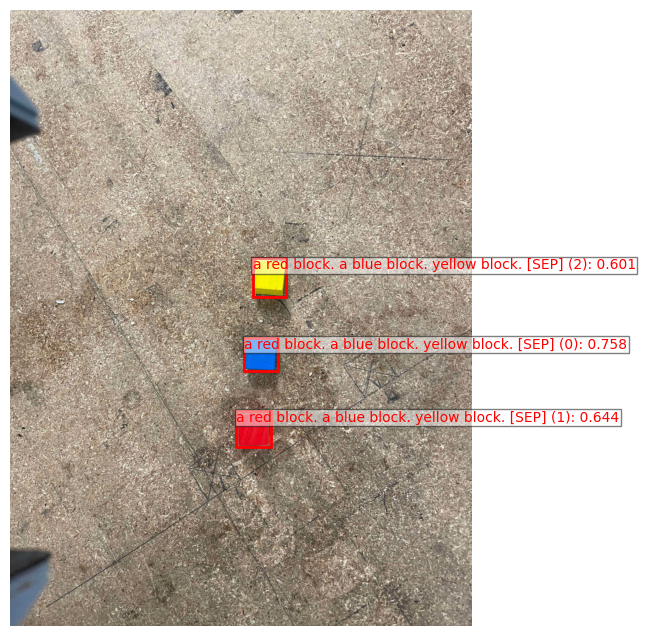

In [3]:
queries = ["a red block", "a blue block", "yellow block"]
bboxes, uboxes = label_dino.label(image, queries, abbrevq, plot=True, topk=True)


In [4]:
label_dino.results[0]['labels']

['a red block. a blue block. yellow block. [SEP]',
 'a red block. a blue block. yellow block. [SEP]',
 'a red block. a blue block. yellow block. [SEP]',
 'a red block. a blue block. yellow block. [SEP]',
 'a red block. a blue block. yellow block. [SEP]',
 'a red block. a blue block. yellow block. [SEP]',
 'a red block. a blue block. yellow block. [SEP]',
 'a red block. a blue block. yellow block. [SEP]',
 'a red block. a blue block. yellow block. [SEP]',
 'a red block. a blue block. yellow block. [SEP]',
 'a red block. a blue block. yellow block. [SEP]',
 'a red block. a blue block. yellow block. [SEP]',
 'a red block. a blue block. yellow block. [SEP]',
 'a red block. a blue block. yellow block. [SEP]',
 'a red block. a blue block. yellow block. [SEP]',
 'a red block. a blue block. yellow block. [SEP]',
 'a red block. a blue block. yellow block. [SEP]',
 'a red block. a blue block. yellow block. [SEP]',
 'a red block. a blue block. yellow block. [SEP]',
 'a red block. a blue block. ye

: 

In [3]:
label_dino.sorted_labels

array(['a red block. a blue block. yellow block. [SEP]',
       'a red block. a blue block. yellow block. [SEP]',
       'a red block. a blue block. yellow block. [SEP]',
       'a red block. a blue block. yellow block. [SEP]',
       'a red block. a blue block. yellow block. [SEP]',
       'a red block. a blue block. yellow block. [SEP]',
       'a red block. a blue block. yellow block. [SEP]',
       'a red block. a blue block. yellow block. [SEP]',
       'a red block. a blue block. yellow block. [SEP]',
       'a red block. a blue block. yellow block. [SEP]',
       'a red block. a blue block. yellow block. [SEP]',
       'a red block. a blue block. yellow block. [SEP]',
       'a red block. a blue block. yellow block. [SEP]',
       'a red block. a blue block. yellow block. [SEP]',
       'a red block. a blue block. yellow block. [SEP]',
       'a red block. a blue block. yellow block. [SEP]',
       'a red block. a blue block. yellow block [SEP]',
       'a red block. a blue bloc

In [5]:
label_vit.sorted_labeled_boxes_coords[:3]

[(array([808.78564, 828.45197, 913.578  , 952.09625], dtype=float32), 0),
 (array([ 781.1911, 1095.1906,  886.8322, 1203.2418], dtype=float32), 0),
 (array([ 755.9107 , 1337.5481 ,  862.88544, 1452.7532 ], dtype=float32), 0)]

In [4]:
import requests

import torch
from PIL import Image
from transformers import AutoProcessor, AutoModelForZeroShotObjectDetection

model_id = "IDEA-Research/grounding-dino-tiny"
device = "cpu"

processor = AutoProcessor.from_pretrained(model_id)
model = AutoModelForZeroShotObjectDetection.from_pretrained(model_id).to(device)

image = Image.open("test.jpg").convert("RGB")
# Check for cats and remote controls
text = "a yellow block. a blue block. a red block."

inputs = processor(images=image, text=text, return_tensors="pt").to(device)
with torch.no_grad():
    outputs = model(**inputs)

results = processor.post_process_grounded_object_detection(
    outputs,
    inputs.input_ids,
    box_threshold=0.4,
    text_threshold=0.3,
    target_sizes=[image.size[::-1]]
)
print(results)

[{'scores': tensor([0.6598, 0.7678, 0.5783]), 'labels': ['a red block', 'a blue block', 'a yellow block'], 'boxes': tensor([[ 751.3755, 1331.2378,  866.6417, 1453.5408],
        [ 777.9363, 1089.0496,  889.8818, 1200.2922],
        [ 806.2037,  824.5101,  918.4952,  952.1558]])}]


In [6]:
import sys
sys.path.append("../")
from magpie.perception.label_owlvit import LabelOWLViT
path = "google/owlvit-base-patch32"
label_vit1 = LabelOWLViT(pth=path, topk=3)

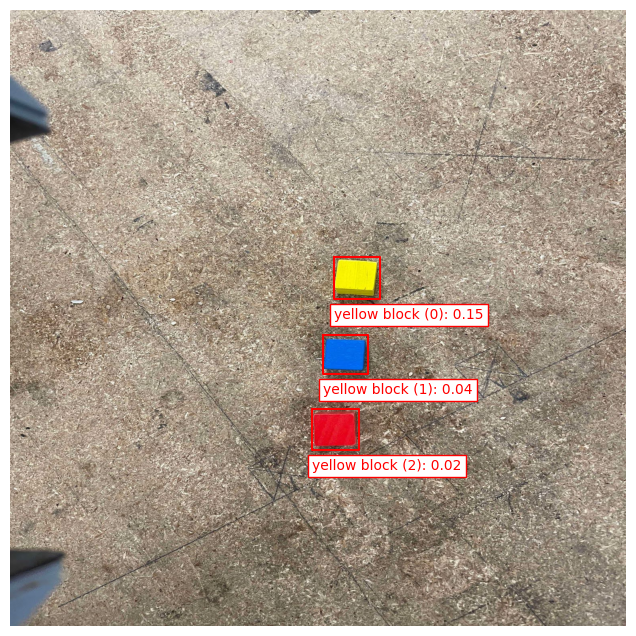

In [7]:
import numpy as np
from PIL import Image
image = Image.open("test.jpg").convert("RGB")
label_vit.set_threshold(0.001)
image = np.array(image)
queries = ["a photo of a yellow block"]
abbrevq = ["yellow block"]
bboxes, uboxes = label_vit1.label(image, queries, abbrevq, plot=True, topk=True)


In [8]:
label_vit1.sorted_labeled_boxes_coords[:3]

[(array([808.1278038 , 821.32295227, 922.95166397, 960.20353699]), 0),
 (array([ 781.16195869, 1081.80727768,  893.65524101, 1209.71176529]), 0),
 (array([ 753.87039185, 1327.1173172 ,  869.4994812 , 1461.44908905]), 0)]